# CS4035 - Cyber Data Analytics
## Lab 2 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 2 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 


## Group Number :

## Student 1 
### Name : Yuan Tian
### ID : 5816971

## Student 2
### Name :
### ID :

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Familiarization task – 1 A4

### 1a. Plot visualizations

In [2]:
# read data
train_df = pd.read_csv("train_data.csv")
train_df

# check if attacked in train_data
if 1 in train_df['Label'].values:
    print("outlier detection")
else:
    print("novelty detection")

# Check the information of the training data
train_df.info()

# Check the statistics of the training data
train_df.describe()


novelty detection
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496800 entries, 0 to 496799
Data columns (total 54 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Id         496800 non-null  int64  
 1   Timestamp  496800 non-null  object 
 2   FIT101     496800 non-null  float64
 3   LIT101     496800 non-null  float64
 4   MV101      496800 non-null  int64  
 5   P101       496800 non-null  int64  
 6   P102       496800 non-null  int64  
 7   AIT201     496800 non-null  float64
 8   AIT202     496800 non-null  float64
 9   AIT203     496800 non-null  float64
 10  FIT201     496800 non-null  float64
 11  MV201      496800 non-null  int64  
 12  P201       496800 non-null  int64  
 13  P202       496800 non-null  int64  
 14  P203       496800 non-null  int64  
 15  P204       496800 non-null  int64  
 16  P205       496800 non-null  int64  
 17  P206       496800 non-null  int64  
 18  DPIT301    496800 non-null  float64
 19  FIT30

,Id,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Label
count,496800.000000,496800.000000,496800.00000,496800.000000,496800.000000,496800.0,496800.00000,496800.000000,496800.000000,496800.000000,...,496800.000000,496800.0,496800.000000,496800.000000,496800.000000,496800.000000,496800.0,496800.000000,496800.0,496800.0
mean,248399.500000,1.844964,586.09884,1.718364,1.746860,1.0,263.73899,8.387852,348.230699,1.828534,...,1.993281,1.0,250.927892,1.183117,190.271470,0.014376,1.0,1.007915,1.0,0.0
std,143413.951204,1.135332,123.89144,0.458669,0.434811,0.0,4.83595,0.090236,49.422251,1.062482,...,0.081694,0.0,19.699763,0.216984,15.286211,0.148666,0.0,0.088612,0.0,0.0
min,0.000000,0.000000,120.62370,0.000000,1.000000,1.0,244.32840,8.190080,300.845900,0.000000,...,1.000000,1.0,8.891951,0.000000,3.108177,0.000000,1.0,1.000000,1.0,0.0
25%,124199.750000,0.000000,508.24470,1.000000,1.000000,1.0,260.70240,8.349654,327.275100,0.008650,...,2.000000,1.0,249.951900,1.057252,188.974000,0.000000,1.0,1.000000,1.0,0.0
50%,248399.500000,2.491112,525.51590,2.000000,2.000000,1.0,265.28450,8.366636,330.940800,2.443085,...,2.000000,1.0,253.028100,1.121328,191.970000,0.000064,1.0,1.000000,1.0,0.0
75%,372599.250000,2.591679,675.85400,2.000000,2.000000,1.0,266.98280,8.407331,335.324300,2.451671,...,2.000000,1.0,255.030800,1.217441,193.860500,0.000128,1.0,1.000000,1.0,0.0
max,496799.000000,2.745092,1000.00000,2.000000,2.000000,1.0,272.52630,8.988273,567.469900,2.487938,...,2.000000,1.0,264.643700,3.668343,200.637600,1.746131,1.0,2.000000,1.0,0.0


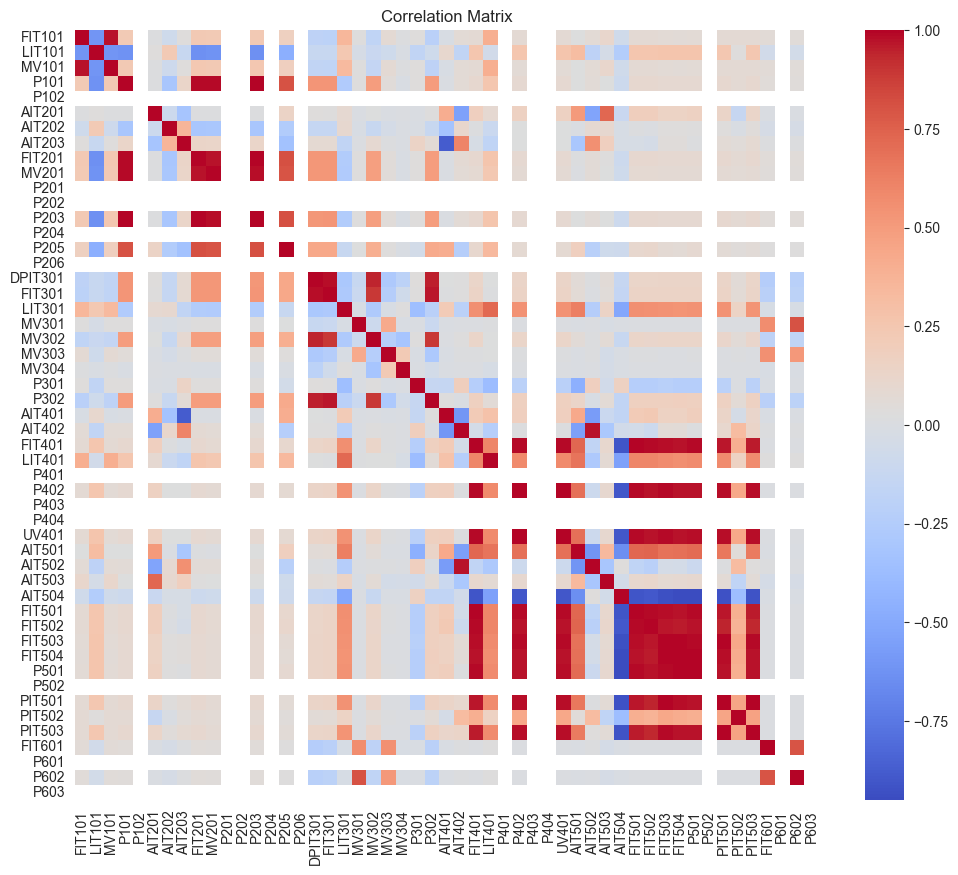

In [3]:
# visualize the data

# Compute correlation matrix
correlation_matrix = train_df.iloc[:, 2:-1].corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [12]:
# Compute correlation matrix
correlation_matrix = train_df.iloc[:, 2:].corr()

# Set a threshold for correlation values (adjust as needed)
threshold = 0.9  # You can change this value to suit your needs

# Find highly positively correlated pairs
highly_pos_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > threshold:
            highly_pos_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Find highly negatively correlated pairs
highly_neg_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] < -threshold:
            highly_neg_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Remove repeated pairs
unique_pos_correlated_pairs = list(set(highly_pos_correlated_pairs))
unique_neg_correlated_pairs = list(set(highly_neg_correlated_pairs))

# Print the highly positively correlated pairs
print("Highly Positively Correlated Pairs:")
for pair in unique_pos_correlated_pairs:
    print(pair)

# Print the highly negatively correlated pairs
print("Highly Negatively Correlated Pairs:")
for pair in unique_neg_correlated_pairs:
    print(pair)


Highly Positively Correlated Pairs:
('FIT301', 'P302')
('P402', 'FIT502')
('FIT401', 'UV401')
('FIT504', 'PIT501')
('FIT503', 'P501')
('FIT501', 'FIT503')
('FIT401', 'FIT504')
('FIT502', 'FIT504')
('FIT201', 'P203')
('P501', 'PIT501')
('FIT401', 'PIT501')
('DPIT301', 'FIT301')
('FIT201', 'MV201')
('P402', 'PIT503')
('FIT502', 'PIT501')
('FIT401', 'FIT502')
('FIT501', 'P501')
('FIT504', 'PIT503')
('DPIT301', 'P302')
('UV401', 'FIT504')
('FIT401', 'PIT503')
('DPIT301', 'MV302')
('AIT402', 'AIT502')
('UV401', 'P501')
('P402', 'FIT503')
('UV401', 'PIT501')
('FIT502', 'PIT503')
('FIT503', 'FIT504')
('MV201', 'P203')
('UV401', 'FIT502')
('P501', 'PIT503')
('FIT503', 'PIT501')
('P402', 'FIT501')
('FIT501', 'FIT504')
('P101', 'P203')
('P101', 'FIT201')
('P402', 'P501')
('FIT401', 'FIT503')
('UV401', 'PIT503')
('P101', 'MV201')
('FIT501', 'PIT501')
('FIT502', 'FIT503')
('FIT504', 'P501')
('FIT401', 'P402')
('FIT503', 'PIT503')
('FIT401', 'FIT501')
('FIT501', 'FIT502')
('FIT401', 'P501')
('UV401

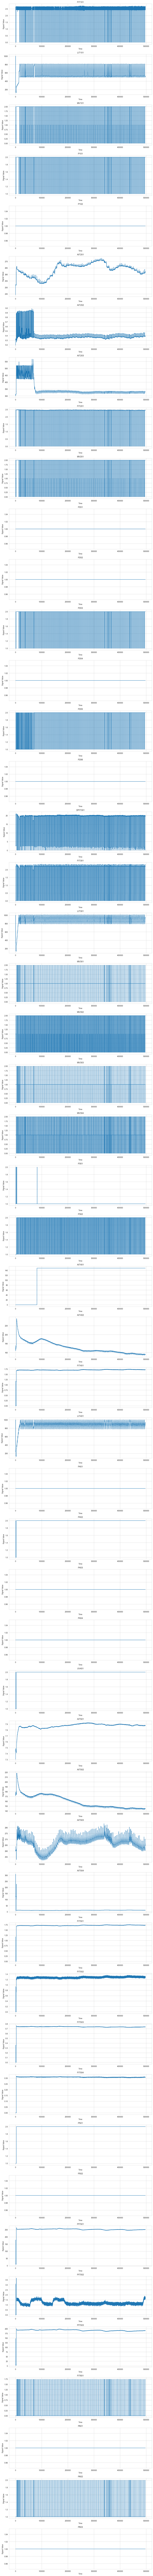

In [11]:
# Plot signals over time (select a subset of signals for visualization)
# subset_signals = train_df.iloc[:, 2:-1]  # Example: visualize the first 8 signals
# subset_signals.plot(subplots=True, figsize=(84, 500))
# plt.xlabel('Time')
# plt.ylabel('Signal Value')
# plt.title('Signals Over Time')
# plt.show()
# Plot signals over time (select a subset of signals for visualization)
subset_signals = train_df.iloc[:, 2:-1]
fig, axes = plt.subplots(len(subset_signals.columns), 1, figsize=(12, 200))

for i, column in enumerate(subset_signals.columns):
    subset_signals[column].plot(ax=axes[i])
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Signal Value')
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


### 1b. Answers to the three questions

1. Signal Types:
- Discrete fluctuating signal: The signal fluctuates between two or three values with some variance.
- Constant signal: The signal remains steady(back up actuator).
- Non-periodic signal: The signal changes over time without a noticeable periodic pattern.

2. Signal correlation: From the correlation matrix, we can observe that there are many highly positively or negatively relations between the signals.   

3. Cyclic behavior: The discrete fluctuating signal and constant signal exhibit cyclic behavior, as they repeat certain patterns over time. However, the non-periodic evolving signal does not demonstrate an obvious periodic pattern.



## 2. LOF task – 1/2 A4 – Individual

### 2a. Plot LOF scores

### 2b. Analysis and answers to the questions

## 3. PCA task – 1/2 A4 – Individual

### 3a. Plot PCA residuals

### 3b. Analysis and answers to the questions

## 4. ARMA task – 1/2 A4 - Individual

### 4a. Print relevant plots and/or metrics to determine the parameters.

### 4b. Plots to study the detected anomalies

### 4c. Analysis and answers to the questions

## 5. N-gram task – 1/2 A4 - Individual

### 5a. Visualise discretization

### 5b. Analysis and answers to the questions. Also provide relevant plots.

## 6.Comparision task 1 A4 - Individual

### 6a. Use the given guidelines and provide a comparision of the above implemented methods.

## 7. Bonus Task 1 A4

### 7a. Provide implementation and analysis.